In [5]:
import numpy as np
import glob
import os
from matplotlib import pyplot as plt

X_train = []
X_test = []
y_train = []
y_test = []

used = ['Adiac', 'Beef', 'Coffee', 'ECG200', 'FISH', 'Gun_Point', 'SwedishLeaf', 'Trace']

for f_name in glob.glob('ClassificationClusteringDatasets/*_TRAIN'):
    label = os.path.split(f_name)[1].replace('_TRAIN', '')
    if label not in used:
        continue
    with open(f_name, 'r') as f:
        ts = f.read()
        for t in ts.split('\n'):
            if(t.strip() == ''):
                continue
            X_train.append([float(i) for i in t.split()])
            y_train.append(label)

for f_name in glob.glob('ClassificationClusteringDatasets/*_TEST'):
    label = os.path.split(f_name)[1].replace('_TEST', '')
    if label not in used:
        continue
    with open(f_name, 'r') as f:
        ts = f.read()
        for t in ts.split('\n'):
            if(t.strip() == ''):
                continue
            X_test.append([float(i) for i in t.split()])
            y_test.append(label)

In [6]:
from scipy.interpolate import interp1d
from scipy import stats

def rescale_ts(ts, length=100):
    x = np.linspace(0, len(ts)-1, num=len(ts))
    y = np.array(ts)

    f = interp1d(x, y)
    new_x = np.linspace(0, len(ts)-1, num=length)
    interpolated_y = f(new_x)
    
    return stats.zscore(interpolated_y)

In [7]:
new_dim = 100
X_train_rescaled = [rescale_ts(X, new_dim) for X in X_train]
X_test_rescaled = [rescale_ts(X, new_dim) for X in X_test]

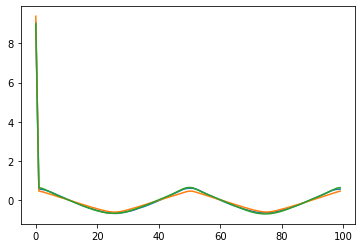

In [8]:
for i in range(3):
    plt.plot(X_train_rescaled[i])

In [17]:
with open('normal-predicted', 'r') as f:
    predicted = f.read().split()
    
predicted = np.array(predicted)
score = np.sum(np.array(y_test) == predicted)
score*100/len(y_test)

63.85240775484678

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [26]:
conf = confusion_matrix(y_test, predicted)

In [27]:
conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

<AxesSubplot:>

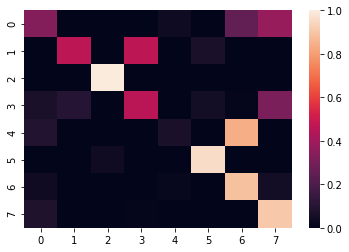

In [28]:
sn.heatmap(conf)

In [29]:
with open('more-neighbor-predicted', 'r') as f:
    predicted = f.read().split()
    
predicted = np.array(predicted)
score = np.sum(np.array(y_test) == predicted)
score*100/len(y_test)

71.85741088180113

In [30]:
conf = confusion_matrix(y_test, predicted)

In [31]:
conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

<AxesSubplot:>

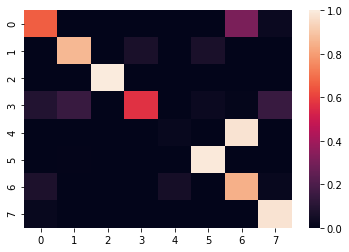

In [32]:
sn.heatmap(conf)

In [36]:
with open('asymmetric-predicted', 'r') as f:
    predicted = f.read().split()
    
predicted = np.array(predicted)
score = np.sum(np.array(y_test) == predicted)
score*100/len(y_test)

86.30393996247655

In [38]:
conf = confusion_matrix(y_test, predicted)

In [39]:
conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

<AxesSubplot:>

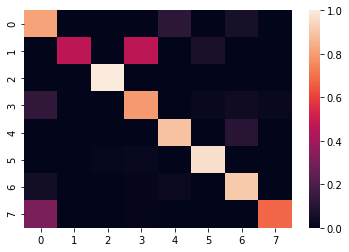

In [40]:
sn.heatmap(conf)

In [34]:
np.unique(y_test)

array(['Adiac', 'Beef', 'Coffee', 'ECG200', 'FISH', 'Gun_Point',
       'SwedishLeaf', 'Trace'], dtype='<U11')

In [35]:
import pandas as pd

df = pd.DataFrame(y_test)
df[0].value_counts()

SwedishLeaf    625
Adiac          391
FISH           175
Gun_Point      150
ECG200         100
Trace          100
Beef            30
Coffee          28
Name: 0, dtype: int64

In [ ]:
for data in ts:
    data = rescale_ts(data)
    plt.plot(data, alpha=0.25)
plt.show()